# 03. Convolutional Neural Netsorks and Computer Vision with TensorFlow

이 강의에서 중요하게 다루거나 새롭게 배운 개념.

1. **Conv2D** layer
- 2D : 높이와 넓이를 가지는 2차원의 input을 의미함.비록 3개의 색상이 있더라도, Convolutions은 개별적으로 해당 채널을 돌림
-filter : 이미지의 특징을 추출하는 수를 말함.
    - kernal : 필터의 크기를 말함.
    - stride : 필터의 움직이는 간격을 의미함.
- padding :
    - valid: 필터가 딱 맞지 않는 가장자리를 제거함.
    - same : 이미지의 바깥쪽에 값이 0인 여백을 만들어 출력되는값이 입력값과 사이즈가 동일하게 만들어줌.

2. **오버피팅**(Overfitting)
- 정의 : 데이터가 train data에 맞춰 패턴을 학습하여, 새로운 데이터를 일반화 하는 능력이 감소한 것을 말함.
- 감지 방법 : 모델의 validation loss가 증가하기 시작할 때, 오버피팅 되었다고 판단.
- 방지 방법 :
    - Droupout
    - 정규화
    - 데이터 증강(Data augmentation)

3. **MaxPooling2D** layer
- 역할 : Conv2D 층에서 가장 중요한 특징만 추출하고 나머지는 제거함.학습 해야할 파라미터를 줄임.
    - 특징 요약
    - 차원 축소
- 특징 :
    - 과적합 방지
    - 연산량 감소


In [6]:
import datetime
print(f"Notebook last run (end-to-end) : {datetime.datetime.now()}")

Notebook last run (end-to-end) : 2025-05-29 09:07:25.041418


In [7]:
import zipfile

# Download zip file of pizza-steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the donwloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-05-29 09:07:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   118MB/s    in 0.9s    

2025-05-29 09:07:26 (118 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (becone one with it)


In [8]:
!ls pizza_steak

test  train


In [9]:
!ls pizza_steak/train/

pizza  steak


In [10]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [11]:
!ls pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [12]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'


In [13]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [14]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [15]:
# View on image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll veiw images form here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape : {img.shape}") # show the shape of the image

    return img

Image shape : (382, 512, 3)


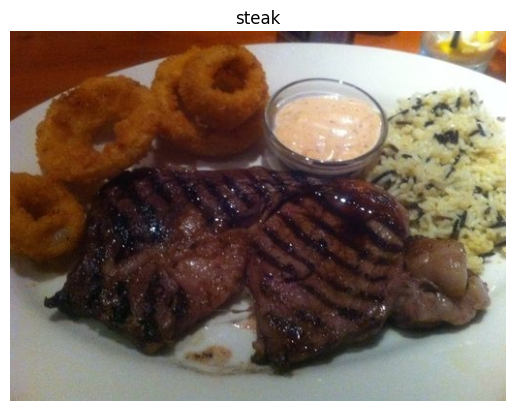

In [16]:
# view a random image from the traiging dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="steak")

In [17]:
# view the img (acutally just a big arrqy/tensor)
img/1.

array([[[ 98.,  33.,  11.],
        [ 93.,  28.,   6.],
        [ 90.,  28.,   5.],
        ...,
        [193., 143.,  90.],
        [192., 141.,  86.],
        [181., 130.,  73.]],

       [[ 96.,  31.,   9.],
        [ 94.,  29.,   7.],
        [ 92.,  30.,   7.],
        ...,
        [197., 146.,  93.],
        [199., 147.,  90.],
        [193., 141.,  83.]],

       [[ 93.,  31.,  10.],
        [ 93.,  31.,  10.],
        [ 94.,  32.,  11.],
        ...,
        [194., 141.,  87.],
        [197., 142.,  85.],
        [194., 138.,  79.]],

       ...,

       [[150., 143., 125.],
        [153., 146., 128.],
        [151., 142., 125.],
        ...,
        [173., 167., 145.],
        [180., 174., 150.],
        [175., 169., 143.]],

       [[150., 143., 124.],
        [151., 144., 125.],
        [149., 140., 123.],
        ...,
        [172., 165., 139.],
        [179., 172., 144.],
        [172., 165., 137.]],

       [[149., 142., 123.],
        [149., 142., 123.],
        [146., 1

In [18]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.38431373, 0.12941176, 0.04313725],
        [0.36470588, 0.10980392, 0.02352941],
        [0.35294118, 0.10980392, 0.01960784],
        ...,
        [0.75686275, 0.56078431, 0.35294118],
        [0.75294118, 0.55294118, 0.3372549 ],
        [0.70980392, 0.50980392, 0.28627451]],

       [[0.37647059, 0.12156863, 0.03529412],
        [0.36862745, 0.11372549, 0.02745098],
        [0.36078431, 0.11764706, 0.02745098],
        ...,
        [0.77254902, 0.57254902, 0.36470588],
        [0.78039216, 0.57647059, 0.35294118],
        [0.75686275, 0.55294118, 0.3254902 ]],

       [[0.36470588, 0.12156863, 0.03921569],
        [0.36470588, 0.12156863, 0.03921569],
        [0.36862745, 0.1254902 , 0.04313725],
        ...,
        [0.76078431, 0.55294118, 0.34117647],
        [0.77254902, 0.55686275, 0.33333333],
        [0.76078431, 0.54117647, 0.30980392]],

       ...,

       [[0.58823529, 0.56078431, 0.49019608],
        [0.6       , 0.57254902, 0.50196078],
        [0.59215686, 0

## A (typical) architecture of a convonlutional neural network

|Hyperparameter/Layer type| What does it do?|Typical vlaues|
|------------|--------------|--------------|
|Input image(s)|Target images you'd like to discover pattenrs in|Whatever ou cna take aphoto ( or video) of|
|Input layer|Takes in target images and preprocesses them for further layers|`input_shape = [batch_size, image_height, image_width, color_channels]`|
|Convolution layer|Extracts/learns the most important reqtures from target images|Mutilple, can create with `tf.keras.layers.ConvXD` (X can be mutilple values)|
|Hidden activation|Adds non-linearity to learned features (non-straight lines)|Usually ReLU(`tf.keras.activations.relu`)|
|Pooling layer|Reduces the dimensionality of learned image features|Average(`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`)|
|Fully connected layer|Further refines learned features from convolution layers|`tf.keras.layers.Dense`|
|Output layer|Takes leanred features and outputs them in shape of target labels|`output_shape = [number_of_classes]` (e.g. 3 for pizza, steak of sushi)|
|Output activation|Adds non-linearities to output layer|`tf.keras.activations.sigmoid`(binary classifiaiton) orf `tf.keras.activations.softmax'|


## An end-to-end example

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel valeus between 1 and 0, also called scaling/normalizion)
train_datagen =ImageDataGenerator(rescale=1./255)
valid_datagen =ImageDataGenerator(rescale=1./255)


# Setup the train and test direcitories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size =32, # number of images to process at a time
                                               target_size =(224, 224), # convert all images to be 224x224
                                               class_mode='binary', #type of problesm we're woking on
                                               seed=41)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
# create a CNN model (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,# can also be (3,3)
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, # pool_size also be
                              padding='valid'), # padding can also
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'), # activation
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation
    ])

# Compile the model ->모델이 학습을 시작하기 전에 학습 방법을 설정하는 단계
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - accuracy: 0.7028 - loss: 0.5854 - val_accuracy: 0.7880 - val_loss: 0.4303
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.8145 - loss: 0.4431 - val_accuracy: 0.8540 - val_loss: 0.3505
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.8243 - loss: 0.3957 - val_accuracy: 0.8660 - val_loss: 0.3307
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - accuracy: 0.8466 - loss: 0.3556 - val_accuracy: 0.8560 - val_loss: 0.3706
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.8854 - loss: 0.3064 - val_accuracy: 0.8380 - val_loss: 0.3622


In [20]:
# check out the layers in our model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before


In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

# Compile the model
model_2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,# use same training data create above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,# use same training data create above
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.4847 - loss: 1.7503 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.5132 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.4793 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931


In [22]:
## add more layer
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increate the number of hidden units in each layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(100, activation='relu'), # increate number of nuerons from 4 to 100 (for each layer)
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),# add an extra layer
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.5615 - loss: 6.8108 - val_accuracy: 0.5660 - val_loss: 1.9971
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.6908 - loss: 0.9250 - val_accuracy: 0.6980 - val_loss: 0.5749
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.6769 - loss: 0.8237 - val_accuracy: 0.7440 - val_loss: 0.6160
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7080 - loss: 0.7276 - val_accuracy: 0.7340 - val_loss: 0.6564
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.7636 - loss: 0.5626 - val_accuracy: 0.7660 - val_loss: 0.4816


In [23]:
# chek out model_3 architecutre
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary classification : Let's break it down

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data ( prepare it for model)
3. Create a model( start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imporve model(try to beat you baseline)
7. Repeat until satisfied


### 1. Import and become one with the data





In [24]:
# import zipfile

# ## Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_stea

# ## Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
# zip_ref.extractall()
# zip_ref.close()

Image shape : (384, 512, 3)
Image shape : (512, 384, 3)


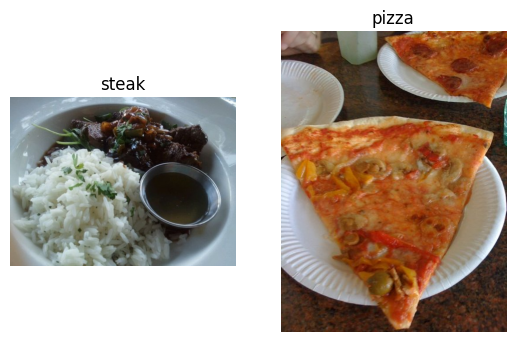

In [25]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")


### 2. Preprocess the data (prepare it for a model)

In [26]:
# Define training and test directory paths
train_dir ="pizza_steak/train/"
test_dir ="pizza_steak/test/"

In [27]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dtatgen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [28]:
# Turn it  into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size = (224,224),
                                               class_mode='binary',
                                               batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels
# imabes, labels = train_data.next() 는 ❌❌❌❌(작동안함)
len(images), len(labels)

(32, 32)

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [31]:
# view the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model( start with a baseline)

In [32]:
# Make the create of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [33]:
# Create the model (this can be our baseline, a 3layer convolutional Neural Nestwork)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [34]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit a model

새로 나온 하이퍼파라미터의 개념
- `steps_per_epoch` :
- `validation_steps` :

In [35]:
# Check lennths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.6211 - loss: 2.4028 - val_accuracy: 0.8200 - val_loss: 0.4196
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.7998 - loss: 0.4376 - val_accuracy: 0.8320 - val_loss: 0.3668
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8810 - loss: 0.3081 - val_accuracy: 0.8240 - val_loss: 0.4080
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9482 - loss: 0.1558 - val_accuracy: 0.8180 - val_loss: 0.4078
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.9832 - loss: 0.0697 - val_accuracy: 0.8120 - val_loss: 0.4637


### 5. Evaluate the model

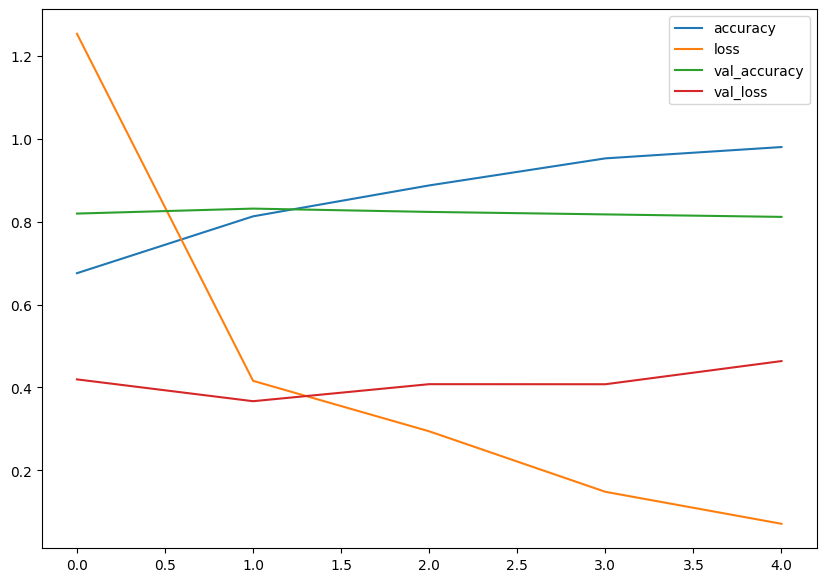

In [37]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [38]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    '''
    Returns separate loss curves for training and validation metrics
    '''
    loss = history.history['loss']
    val_loss= history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot loss
    plt.figure() # 이전 그림 위에 겹쳐지지 않도록 하기 위한 장치
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();



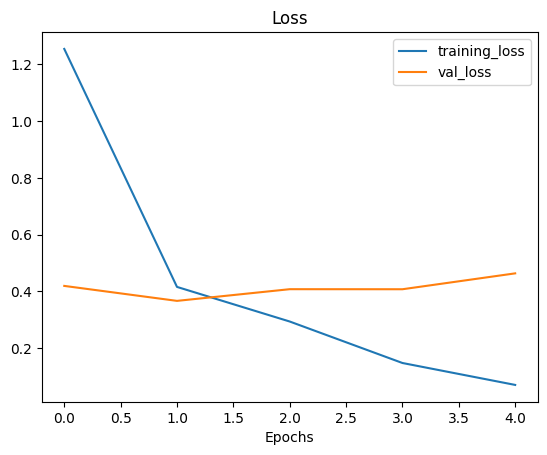

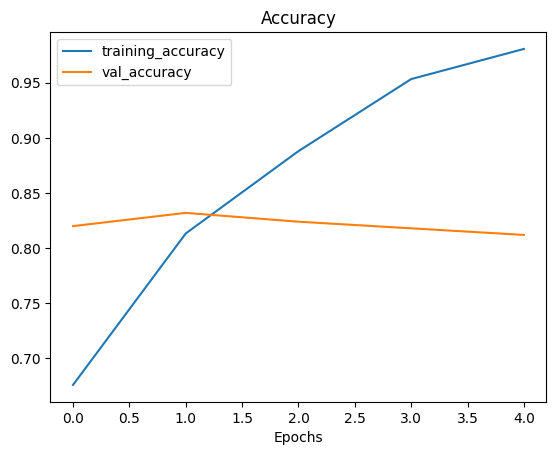

In [39]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

In [40]:
# Create the model (this can ve our baseline, a 3 layer convolutions Neural Network)
model_5 = Sequential([
    Conv2D(10,3, activation = 'relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size = 2), # reduce number of featurs by half
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.6168 - loss: 0.6358 - val_accuracy: 0.8140 - val_loss: 0.4332
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7761 - loss: 0.4708 - val_accuracy: 0.8280 - val_loss: 0.3918
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8130 - loss: 0.4239 - val_accuracy: 0.8360 - val_loss: 0.3613
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7968 - loss: 0.4447 - val_accuracy: 0.8360 - val_loss: 0.3559
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.8297 - loss: 0.3753 - val_accuracy: 0.8180 - val_loss: 0.3685


In [43]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

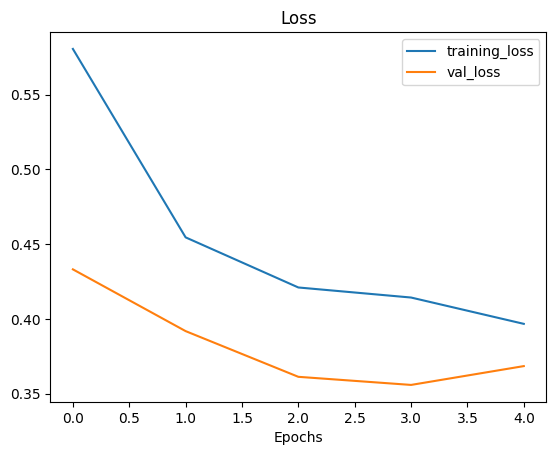

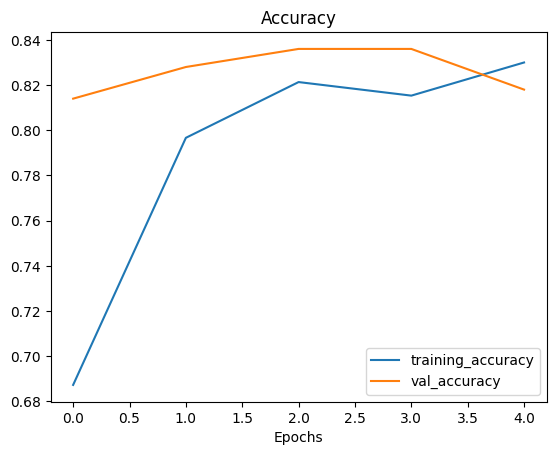

In [44]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,# rotate the image slightly between 0 and 20 degress (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range = 0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the iamge height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instancewithout data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)



In [46]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle


# Create non-augmented adata batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size= (224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size= 32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [47]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

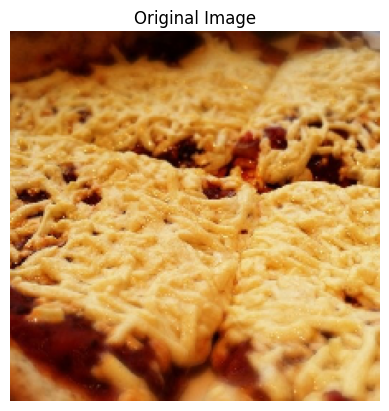

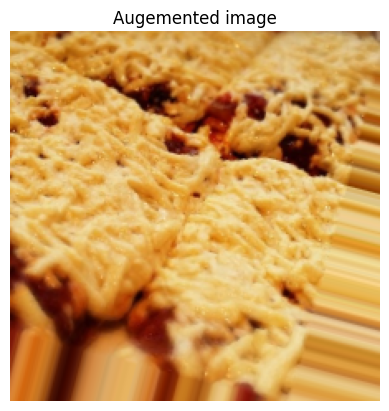

In [48]:
# Show original image and augmented image
random_number = random.randint(0,31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augemented image")
plt.axis(False)

In [49]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), # reduce number of featurs by half
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# Compile the moel
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmetned training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 529ms/step - accuracy: 0.5041 - loss: 0.7690 - val_accuracy: 0.5000 - val_loss: 0.6770
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 687ms/step - accuracy: 0.5359 - loss: 0.7006 - val_accuracy: 0.6900 - val_loss: 0.6793
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 488ms/step - accuracy: 0.5847 - loss: 0.6865 - val_accuracy: 0.6060 - val_loss: 0.6665
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 646ms/step - accuracy: 0.5714 - loss: 0.6814 - val_accuracy: 0.5120 - val_loss: 0.6897
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 549ms/step - accuracy: 0.5604 - loss: 0.8035 - val_accuracy: 0.7120 - val_loss: 0.6395


`shuffle = True`

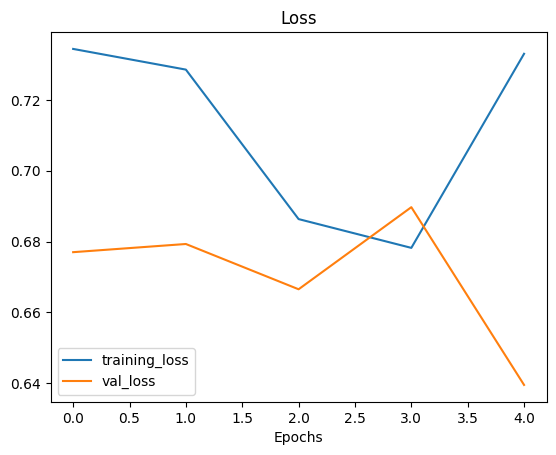

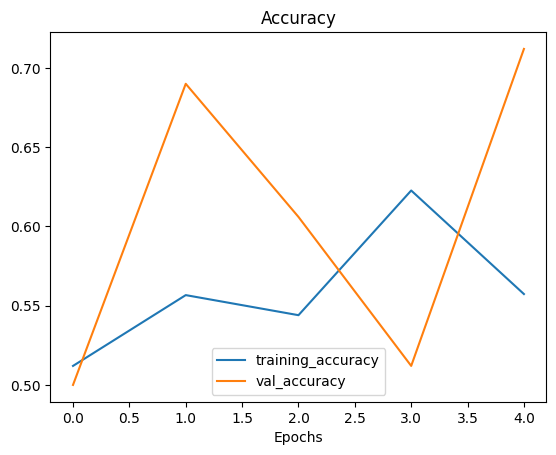

In [50]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [51]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size = 32,
                                                                            class_mode = 'binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [52]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [53]:
# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 610ms/step - accuracy: 0.5430 - loss: 0.6860 - val_accuracy: 0.6180 - val_loss: 0.6012
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 616ms/step - accuracy: 0.7332 - loss: 0.5545 - val_accuracy: 0.7860 - val_loss: 0.4433
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 520ms/step - accuracy: 0.7693 - loss: 0.4937 - val_accuracy: 0.8480 - val_loss: 0.3670
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 522ms/step - accuracy: 0.7800 - loss: 0.4593 - val_accuracy: 0.8600 - val_loss: 0.3193
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 597ms/step - accuracy: 0.7961 - loss: 0.4602 - val_accuracy: 0.8680 - val_loss: 0.3045


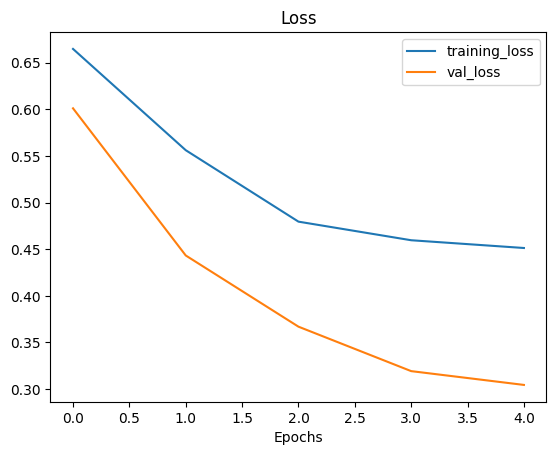

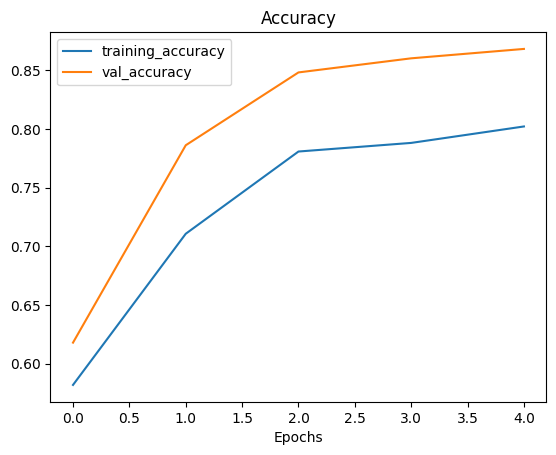

In [54]:
# check model's performance history training on augmented data
plot_loss_curves(history_7)

### 7. Repeat until satisfied



In [55]:
# Create a CNN mode (same as Tiny VGG but for binary classification)
model_8 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 534ms/step - accuracy: 0.5601 - loss: 0.6686 - val_accuracy: 0.7300 - val_loss: 0.5184
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 444ms/step - accuracy: 0.7252 - loss: 0.5461 - val_accuracy: 0.8500 - val_loss: 0.3686
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 460ms/step - accuracy: 0.7700 - loss: 0.4843 - val_accuracy: 0.8300 - val_loss: 0.3882
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 546ms/step - accuracy: 0.7720 - loss: 0.5023 - val_accuracy: 0.8760 - val_loss: 0.3186
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 549ms/step - accuracy: 0.7915 - loss: 0.4511 - val_accuracy: 0.8200 - val_loss: 0.3825


In [56]:
# check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [57]:
# check model_8 architecture(same as model_1)
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

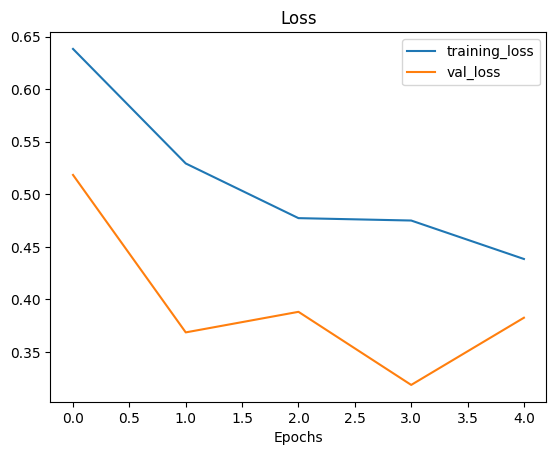

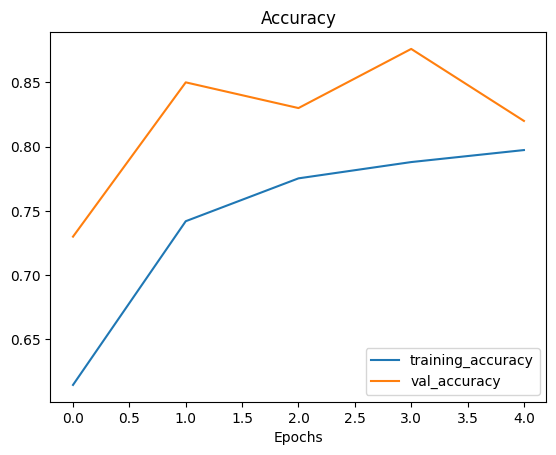

In [58]:
# Check out the TinyVgg model performance
plot_loss_curves(history_8)

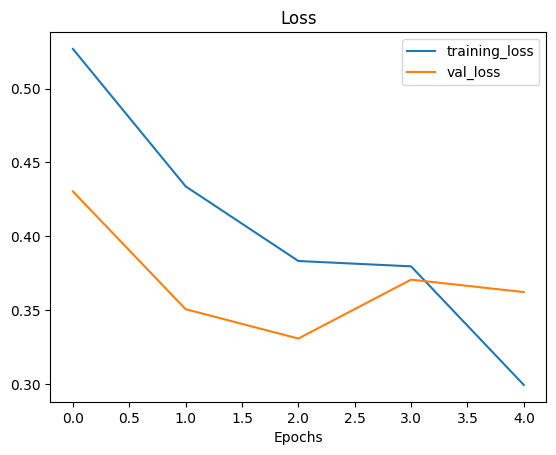

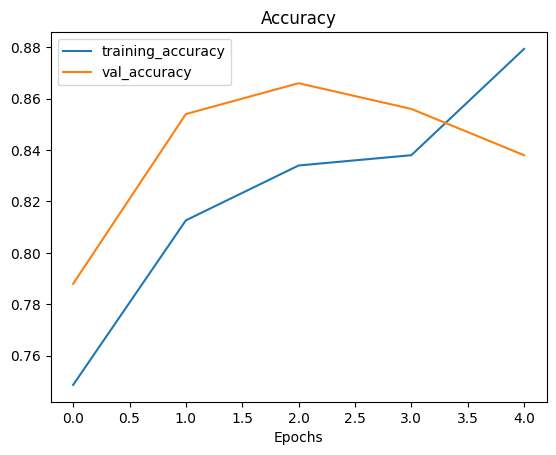

In [59]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

## Making a prediction with our trained model

In [60]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2025-05-29 09:19:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-05-29 09:19:49 (40.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

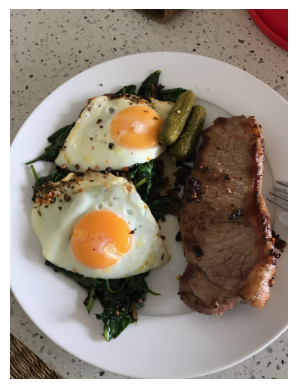

In [61]:
# view our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [62]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

`tf.io.read_file` : 이미지 파일을 바이트 단위로 읽어옴. 실제 이미지로 변환하려면  `tf.image.decode_*`  계열 함수를 사용해야함.

`tf.image` : 이미지 디코딩, 리사이즈 변형 등 이미지 처리 함수 모음

In [63]:
# Create a function to import an image and resize it to be able
def load_and_prep_image(filename, img_shape = 224):

    # Read in target file (an_image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels
    # (our model is trained on images with 3 colour channels and sometiems images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [64]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [65]:
# Make a prediction on our custom image (spoiler : this won't work)
model_8.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [66]:
# Add am extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis = 0) # add an extra dimension a
# steak = steak[tf.newaxis,...] # alrernative to the above,
print(f"Shape after new dimension : {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension : (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [67]:
# Make a prediciton on custom image tensor
pred = model_8.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


array([[0.9669986]], dtype=float32)

In [68]:
# Remind oursleves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [69]:
# We can index the predicted class by ounding the prediction
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

np.str_('steak')

In [70]:
def pred_and_plot(model, filename, class_names):

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Predictions: {pred_class}")
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


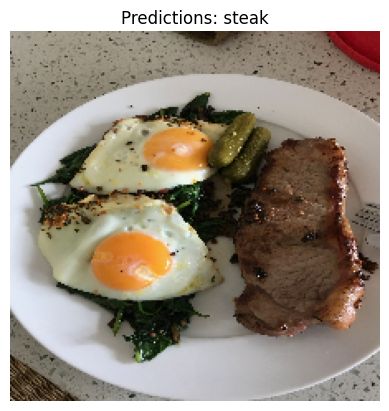

In [71]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2025-05-29 09:21:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-05-29 09:21:59 (52.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


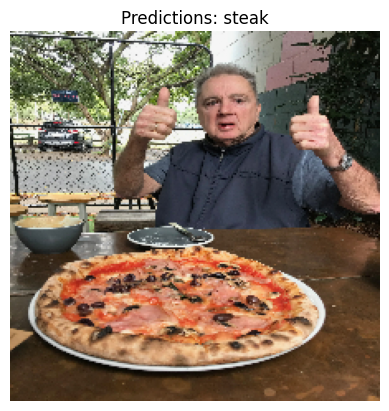

In [72]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi-class Classification

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model
7. Repeat until satisfied



### 1. Import and become one with the data

In [73]:
import zipfile

# Download zip file of 10_food_classes images
# see how this data was crated
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-05-29 09:26:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  61.9MB/s    in 8.1s    

2025-05-29 09:27:06 (61.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [76]:
import os

# Walk through 10_food_classes directory and list number of file
for dirpath, dirnames, filename in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filename)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [77]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [80]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape : (512, 512, 3)


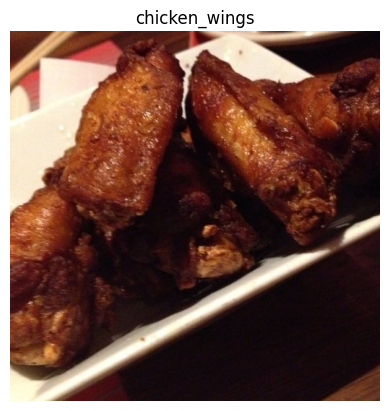

In [82]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resclae the data and create data generator instances
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)



In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, excep to be multi_class)
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Fit a model

In [88]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 120ms/step - accuracy: 0.1570 - loss: 2.2400 - val_accuracy: 0.2592 - val_loss: 2.0647
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 106ms/step - accuracy: 0.3448 - loss: 1.9082 - val_accuracy: 0.3160 - val_loss: 1.9449
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.5306 - loss: 1.4108 - val_accuracy: 0.3060 - val_loss: 2.0469
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 126ms/step - accuracy: 0.7308 - loss: 0.8770 - val_accuracy: 0.2796 - val_loss: 2.5775
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.8884 - loss: 0.3898 - val_accuracy: 0.2668 - val_loss: 3.6298


### 5. Evaluate the model

In [90]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.2445 - loss: 3.7782


[3.6297707557678223, 0.2667999863624573]

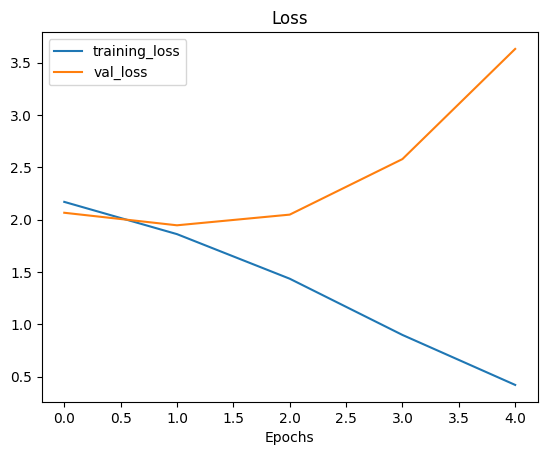

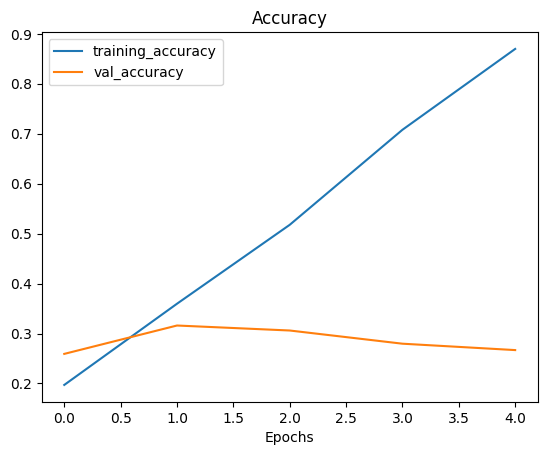

In [91]:
# Check out the model's loss cureve ont he 10 classes of data
plot_loss_curves(history_9)

### 6. Adjust the model parameters

모델의 성능을 좋게 하면서 과적합을 방지하기 위해서는 아래와 같은 방법들을 사용함:
- **새로운 학습 데이터를 더 넣음** - 새로운 학습 데이터를 넣으면 더 일반적인 패턴을 학습하게 되어 성능이 올라감
- **모델을 단순화 함** - 모델을 복잡하게 하는 것은 여러개의 모델 layer를 생성하는 것이고 반대로는 layer를 제거하는 것임.
-  **데이터 증강을 사용** - 맨 첫번째 이유와 같은 이유에서임.
- **전이 학습을 사용함** - 전이 학습은 다른 모델이 학습한 패턴을 기반으로 새로운 작업에 적용하는 방식임. 이미 일반화된 모델을 사용하기 때문에 성능이 좋음.

In [94]:
#  Try a simplified model(removed two layers)
model_10 = Sequential([
    Conv2D(10, 3,activation='relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 =model_10.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = test_data,
                         validation_steps = len(test_data))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.1848 - loss: 2.2287 - val_accuracy: 0.3340 - val_loss: 1.9201
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.3799 - loss: 1.8168 - val_accuracy: 0.3752 - val_loss: 1.8086
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 159ms/step - accuracy: 0.5270 - loss: 1.4602 - val_accuracy: 0.3616 - val_loss: 1.8205
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.6874 - loss: 1.0273 - val_accuracy: 0.3368 - val_loss: 2.0160
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.8589 - loss: 0.5657 - val_accuracy: 0.3188 - val_loss: 2.3956


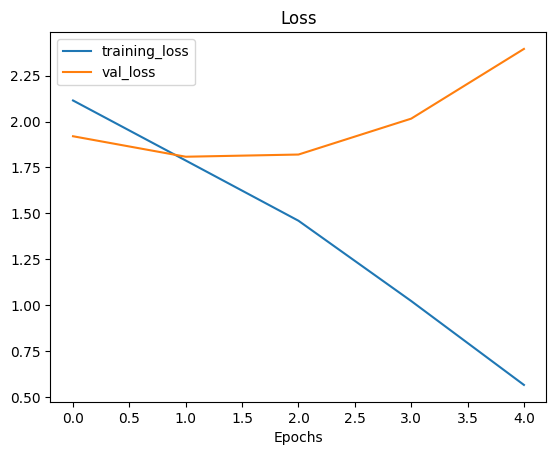

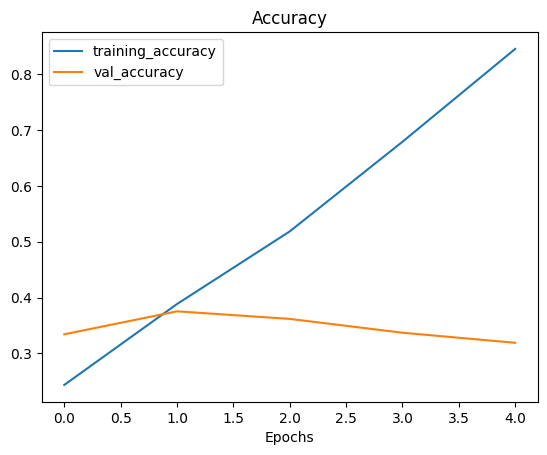

In [95]:
# check out the loss curves of medoe_10
plot_loss_curves(history_10)

In [96]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range=0.2,
                                             horizontal_flip = True
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [123]:
#  Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model( same setup as used for model_10)
model_11.compile(loss='categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(train_data_augmented,
                        epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 425ms/step - accuracy: 0.1438 - loss: 2.6842 - val_accuracy: 0.2276 - val_loss: 2.1125
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 414ms/step - accuracy: 0.2048 - loss: 2.1644 - val_accuracy: 0.2500 - val_loss: 2.0656
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 419ms/step - accuracy: 0.2295 - loss: 2.1172 - val_accuracy: 0.3064 - val_loss: 1.9669
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 416ms/step - accuracy: 0.2688 - loss: 2.0506 - val_accuracy: 0.3096 - val_loss: 1.9606
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 415ms/step - accuracy: 0.2900 - loss: 2.0424 - val_accuracy: 0.3312 - val_loss: 1.9206


`tf.keras.layers.RandomFlip`:데이터 증강을 위해 사용하는 것으로 이미지를 랜덤으로 뒤집어 학습 데이터의 향상 시킴

`tf.keras.utils.image_dataset_from_dirctory` : 디렉토리에 정리된 이미지 파일들을 자동으로 로드하고, TensorFlow용 데이터셋으로 변환하는 역할을 함.

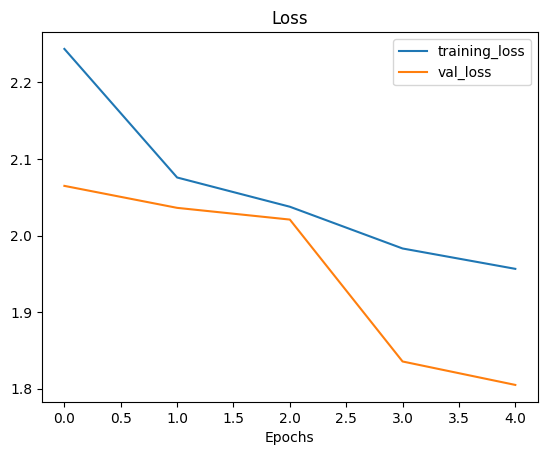

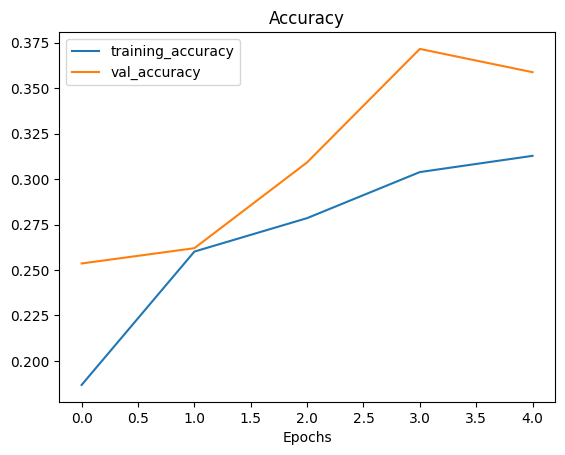

In [100]:
# check out our model's performance with augmented data
plot_loss_curves(history_11)

### 7. Repeat until satisfied

### Making a prediction with our trained model


In [101]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [102]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


In [116]:

!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


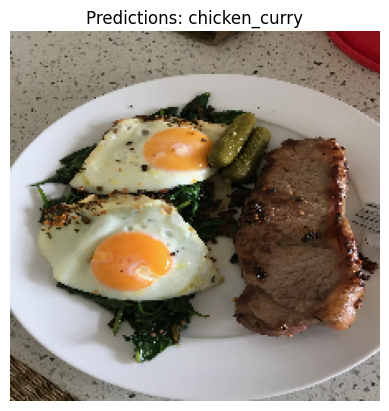

In [103]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names = class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


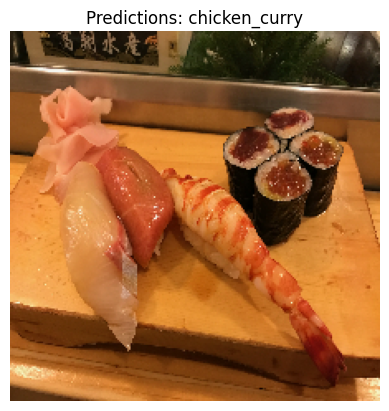

In [119]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


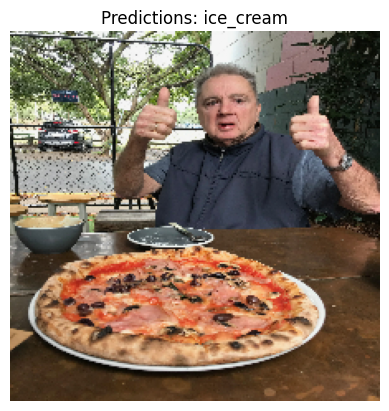

In [124]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

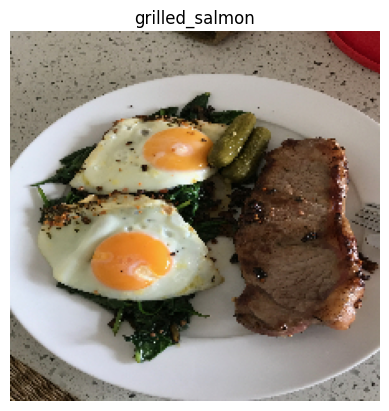

In [125]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img,axis=0))

# Match the prediction class to the highest prediction probablility
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False)

In [126]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [106]:
# check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis = 0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0.05740827, 0.02668689, 0.03799235, 0.3768796 , 0.08078774,
        0.07100892, 0.01947759, 0.11451948, 0.15303278, 0.06220639]],
      dtype=float32)

In [108]:
# Find the predicted class name
class_names[pred.argmax()]

np.str_('grilled_salmon')

In [118]:
# Adjust function to work with multi-calss
def pred_and_plot(model,filename, class_names):

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1 : # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Predictions: {pred_class}")
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


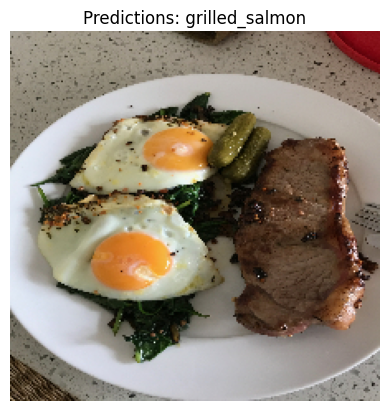

In [110]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


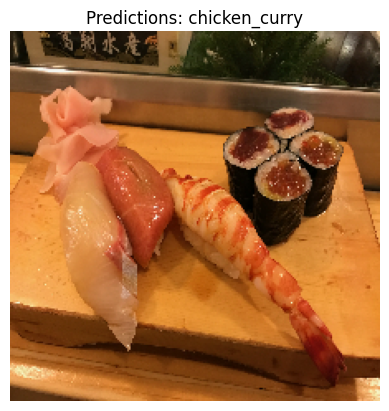

In [117]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


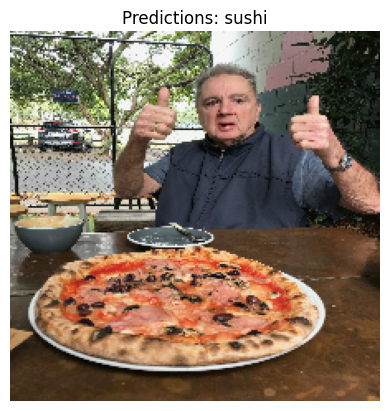

In [120]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


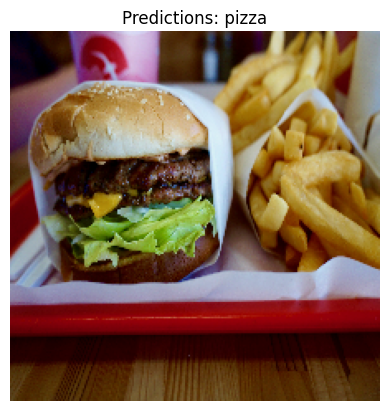

In [121]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

## Saving and loading our model


In [129]:
# Save a model
# model_11.save("saved_trained_model") ---> 여기에 .keras 를 붙이질 않으면 작동하지 않음
model_11.save("saved_trained_model.keras")


In [130]:
# Load in a model and evaluate it
# loaded_model_11 = tf.keras.models.load_model("saved_trained_model") --->  위와 마찬가지 이유로 모델이름에 .keras를 붙이질 않으면 작동하지 않음.
loaded_model_11 = tf.keras.models.load_model("saved_trained_model.keras")
loaded_model_11.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.3273 - loss: 1.9406


[1.9206236600875854, 0.3312000036239624]

In [131]:
# Compare our unasaved model's results (same as above)
model_11.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.3289 - loss: 1.9276


[1.920624017715454, 0.3312000036239624]